In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections

In [2]:
train_df = pd.read_csv("dataset/wine_train.csv", sep=';', quotechar='"')
test_df = pd.read_csv("dataset/wine_test.csv", sep=';', quotechar='"')

In [3]:
# Funcție de grupare
def map_quality(q):
    if q in [3, 4]:
        return "low"
    elif q in [5, 6]:
        return "medium"
    else:
        return "high"

In [4]:
train_df["quality_group"] = train_df["quality"].apply(map_quality)
test_df["quality_group"] = test_df["quality"].apply(map_quality)

In [5]:
print("Distribuție train:")
print(train_df["quality_group"].value_counts())
print("\nDistribuție test:")
print(test_df["quality_group"].value_counts())

Distribuție train:
quality_group
medium    2932
high       833
low        153
Name: count, dtype: int64

Distribuție test:
quality_group
medium    723
high      227
low        30
Name: count, dtype: int64


In [20]:
numeric_df = train_df.select_dtypes(include="number")
desc_stats = numeric_df.describe().T
desc_stats_rounded = desc_stats.round(3)
print(desc_stats_rounded)

                       count     mean     std     min      25%      50%  \
fixed acidity         3918.0    6.865   0.844   3.800    6.300    6.800   
volatile acidity      3918.0    0.279   0.102   0.080    0.210    0.260   
citric acid           3918.0    0.333   0.120   0.000    0.270    0.320   
residual sugar        3918.0    6.451   5.139   0.600    1.700    5.200   
chlorides             3918.0    0.046   0.022   0.009    0.036    0.043   
free sulfur dioxide   3918.0   35.095  16.677   3.000   23.000   33.000   
total sulfur dioxide  3918.0  138.001  42.068  10.000  108.000  134.000   
density               3918.0    0.994   0.003   0.987    0.992    0.994   
pH                    3918.0    3.189   0.150   2.720    3.090    3.180   
sulphates             3918.0    0.490   0.114   0.220    0.410    0.470   
alcohol               3918.0   10.509   1.228   8.000    9.500   10.400   
quality               3918.0    5.871   0.887   3.000    5.000    6.000   

                        

In [6]:
X_train = train_df.drop(["quality", "quality_group"], axis=1)
y_train = train_df["quality_group"]

X_test = test_df.drop(["quality", "quality_group"], axis=1)
y_test = test_df["quality_group"]

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = RidgeClassifier(alpha=1.0)
model.fit(X_train_scaled, y_train)

RidgeClassifier()

In [9]:
y_pred = model.predict(X_test_scaled)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAcuratețea modelului RidgeClassifier pe grupuri: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Acuratețea modelului RidgeClassifier pe grupuri: 76.22%

Classification Report:
              precision    recall  f1-score   support

        high       0.67      0.20      0.31       227
         low       0.00      0.00      0.00        30
      medium       0.77      0.97      0.86       723

    accuracy                           0.76       980
   macro avg       0.48      0.39      0.39       980
weighted avg       0.72      0.76      0.70       980



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

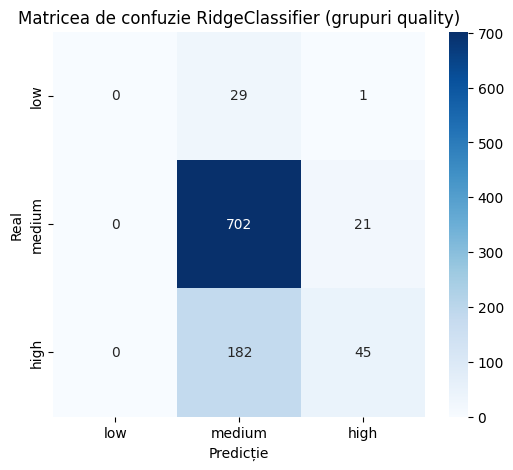

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["low", "medium", "high"],
    yticklabels=["low", "medium", "high"]
)
plt.xlabel("Predicție")
plt.ylabel("Real")
plt.title("Matricea de confuzie RidgeClassifier (grupuri quality)")
plt.show()

In [12]:

print(model.classes_)

print(train_df["quality"].value_counts().sort_index())
print(test_df["quality"].value_counts().sort_index())

['high' 'low' 'medium']
quality
3      15
4     138
5    1166
6    1766
7     688
8     140
9       5
Name: count, dtype: int64
quality
3      5
4     25
5    291
6    432
7    192
8     35
Name: count, dtype: int64


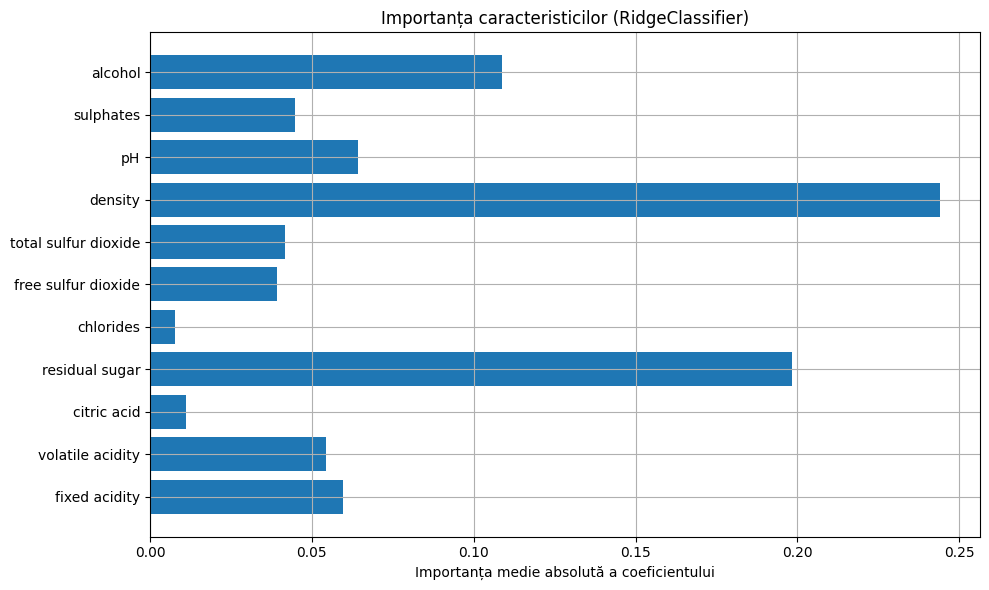

In [13]:
# Media absolută a coeficienților pe fiecare caracteristică
mean_abs_coefs = np.mean(np.abs(model.coef_), axis=0)

# Numele caracteristicilor
feature_names = X_train.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_names, mean_abs_coefs)
plt.xlabel("Importanța medie absolută a coeficientului")
plt.title("Importanța caracteristicilor (RidgeClassifier)")
plt.grid(True)
plt.tight_layout()
plt.show()

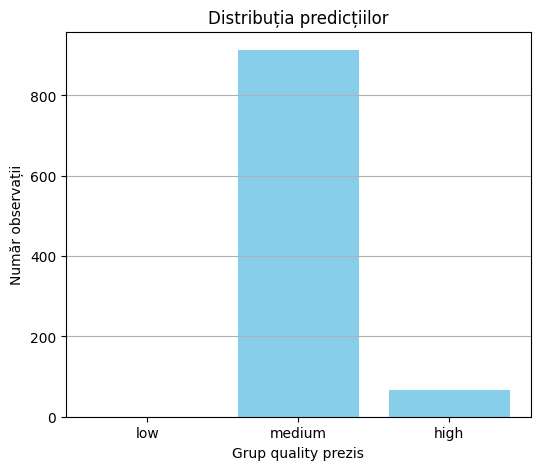

In [14]:
# Numărăm predicțiile
pred_counts = collections.Counter(y_pred)

# Asigurăm ordinea consistentă
labels = ["low", "medium", "high"]
counts = [pred_counts.get(label, 0) for label in labels]

# Plot
plt.figure(figsize=(6,5))
plt.bar(labels, counts, color="skyblue")
plt.xlabel("Grup quality prezis")
plt.ylabel("Număr observații")
plt.title("Distribuția predicțiilor")
plt.grid(True, axis="y")
plt.show()

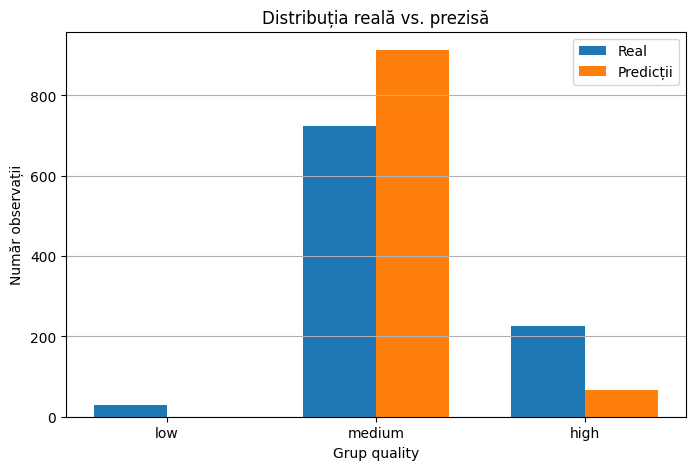

In [15]:
# Numărăm etichetele reale
real_counts = collections.Counter(y_test)

real_counts_values = [real_counts.get(label, 0) for label in labels]

# Plot comparativ
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, real_counts_values, width, label="Real")
plt.bar(x + width/2, counts, width, label="Predicții")
plt.xticks(x, labels)
plt.xlabel("Grup quality")
plt.ylabel("Număr observații")
plt.title("Distribuția reală vs. prezisă")
plt.legend()
plt.grid(True, axis="y")
plt.show()


In [16]:
print("Ordinea claselor:", model.classes_)

Ordinea claselor: ['high' 'low' 'medium']



Corelații Pearson între fiecare variabilă numerică și quality:
alcohol                 0.431681
pH                      0.103161
sulphates               0.062008
free sulfur dioxide     0.028810
citric acid            -0.014022
residual sugar         -0.096854
fixed acidity          -0.117994
total sulfur dioxide   -0.162517
chlorides              -0.199168
volatile acidity       -0.204256
density                -0.300557
Name: quality, dtype: float64


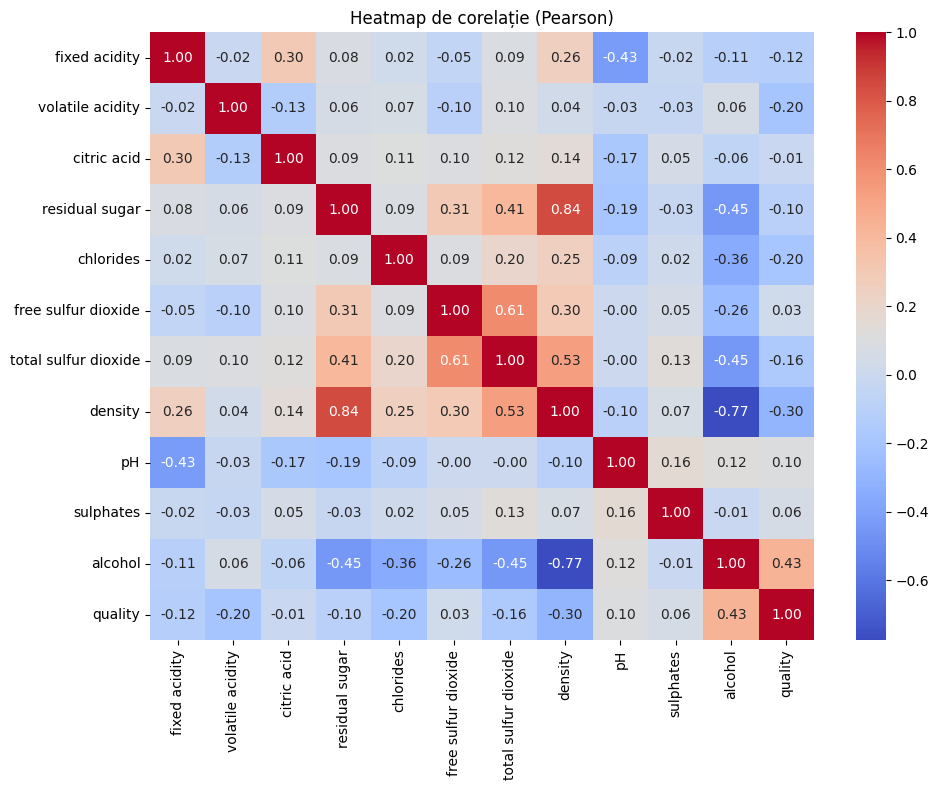

In [17]:
# Corelații Pearson între variabile numerice și quality
numeric_df = train_df.select_dtypes(include='number')

# Calculează corelația cu quality
correlations = numeric_df.corr()['quality'].drop('quality').sort_values(ascending=False)

print("\nCorelații Pearson între fiecare variabilă numerică și quality:")
print(correlations)

# Heatmap complet al corelațiilor
plt.figure(figsize=(10,8))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Heatmap de corelație (Pearson)")
plt.tight_layout()
plt.show()


In [18]:
# Alcohol (+0.43): Cea mai puternică corelație pozitivă. Cu cât alcoolul e mai mare, cu atât scorul de calitate e mai mare și nu e surprinzător: vinurile cu tărie mai mare tind să fie considerate mai bune.
# pH (+0.10): O corelație pozitivă slabă, dar care sugerează că un pH mai mare poate fi asociat cu o calitate mai bună.
# Sulphates (+0.06): Corelație foarte slab pozitivă. Sulfații contribuie la stabilitate și conservare, dar efectul e mic.
# Density (–0.30): Corelație negativă. Vinurile mai dense tind să fie de calitate mai slabă, probabil pentru că densitatea mare sugerează zahăr rezidual excesiv sau fermentare incompletă.
# Volatile acidity (–0.20): Corelație negativă. Aciditatea volatilă ridicată scade calitatea vinului, reflectând un gust acru, neplăcut.
# Chlorides (–0.19): Corelație negativă. Sarea(cloruri) ridicată în vin afectează gustul.
# Fixed acidity (–0.11): Corelație negativă slabă. Aciditatea fixă mai mare poate indica un gust mai acru, ceea ce nu e ideal pentru calitate.
# Restul caracteristicilor (volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, residual sugar) au corelații slabe sau foarte slabe cu quality, nu influentează semnificativ calitatea vinului.

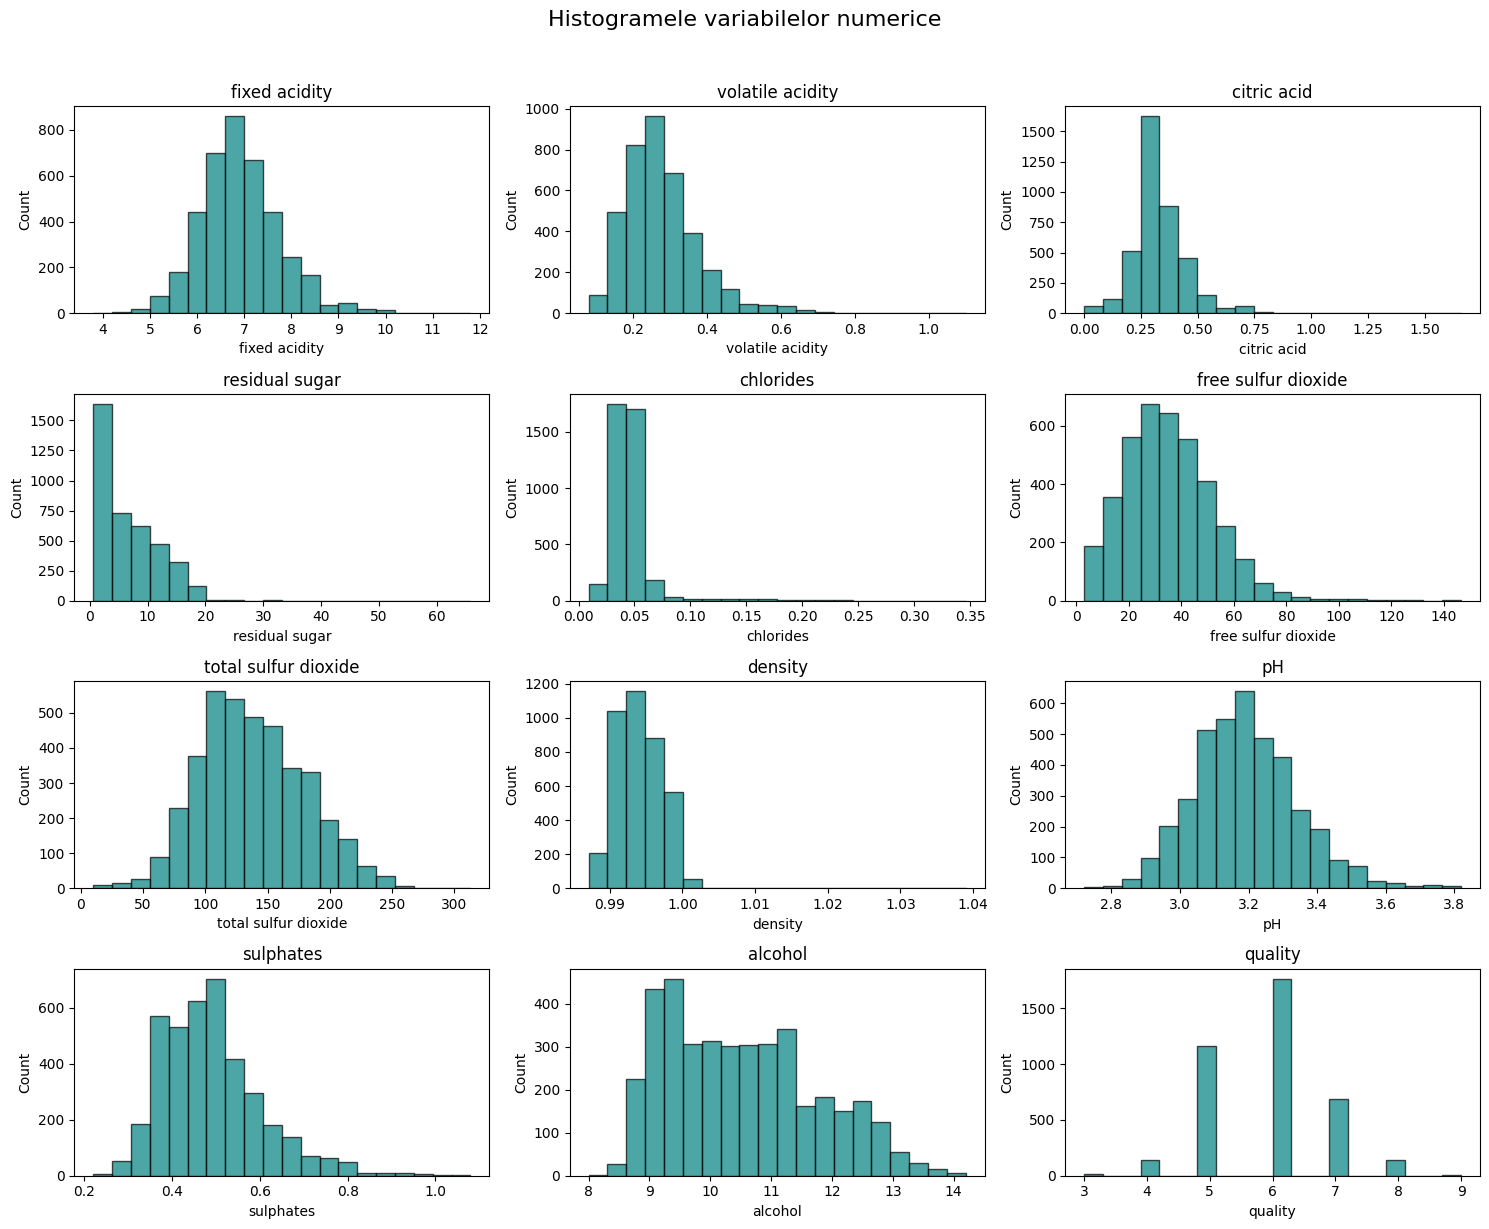

In [19]:
# Histograme pentru toate variabilele numerice
numeric_columns = train_df.select_dtypes(include='number').columns

# Setăm un grid de subploturi
num_vars = len(numeric_columns)
cols = 3
rows = (num_vars // cols) + int(num_vars % cols > 0)

plt.figure(figsize=(cols * 5, rows * 3))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    plt.hist(train_df[col], bins=20, color='teal', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.suptitle("Histogramele variabilelor numerice", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
